In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [55]:
image_size = (256, 256)
batch_size = 128
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'data//training_set',
    validation_split=0.2,
    color_mode='rgb',
    label_mode='binary',
    subset='training',
    seed=13372,
    image_size=image_size,
    batch_size=batch_size)

train_size = int(0.8 * dataset.cardinality().numpy())
valid_size = dataset.cardinality().numpy() - train_size
train_ds = dataset.take(train_size)
valid_ds = dataset.skip(train_size)

Found 1367 files belonging to 2 classes.
Using 1094 files for training.


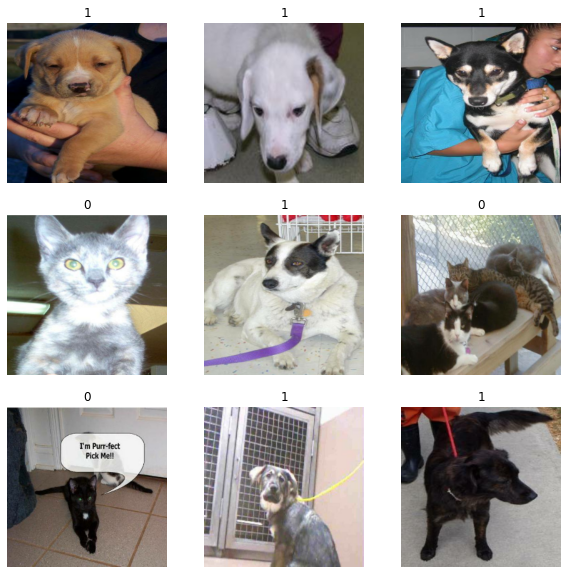

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [82]:
def cnn_model2(input_shape, num_classes):
  model = tf.keras.Sequential()
  # Add input layer with input_shape and float32 dtype
  model.add(tf.keras.layers.InputLayer(input_shape=input_shape, dtype='float32'))
  # Add 5 convolutional layers with 32, 64, 128, 256, and 512 filters
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
  model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='sigmoid'))
  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='sigmoid'))
  
  # Add max pooling layer after each convolutional layer
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  
  # Flatten the output of the convolutional layers
  model.add(tf.keras.layers.Flatten())
  
  # Add 2 fully connected layers with 512 and 128 units, respectively
  model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
  model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
  
  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes
    
  model.add(layers.Dropout(0.5))
  # Add output layer with num_classes units and softmax activation
  model.add(tf.keras.layers.Dense(units, activation=activation))
  
  return model

In [83]:
input_shape = (256, 256, 3)
num_classes = 2
model = cnn_model2(input_shape, num_classes)

ResourceExhaustedError: OOM when allocating tensor with shape[7746048,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]

In [ ]:
model.summary()

In [60]:
epochs = 20

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [61]:

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=valid_ds
)

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.9055 - accuracy: 0.5312 - val_loss: 10.0294 - val_accuracy: 0.5505
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.8394 - accuracy: 0.5234 - val_loss: 1.5733 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 18s 2s/step - loss: 0.8215 - accuracy: 0.5156 - val_loss: 0.8244 - val_accuracy: 0.5808
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 0.7513 - accuracy: 0.5592 - val_loss: 2.4207 - val_accuracy: 0.5253
Epoch 5/20
7/7 [==============================] - 19s 3s/step - loss: 0.7884 - accuracy: 0.5435 - val_loss: 0.8770 - val_accuracy: 0.5606
Epoch 6/20
7/7 [==============================] - 18s 2s/step - loss: 0.7536 - accuracy: 0.5770 - val_loss: 1.1936 - val_accuracy: 0.5253
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.7081 - accuracy: 0.5982 - val_loss: 1.1711 - val_accuracy: 0.5000
Epoch 8/20
7/7 [=================

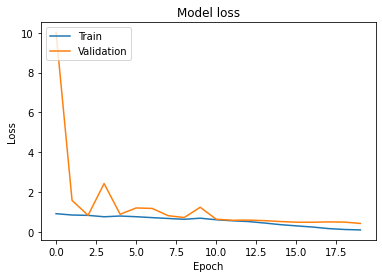

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the figure as a PNG file
#plt.savefig('loss_curves_model1.png', bbox_inches='tight')

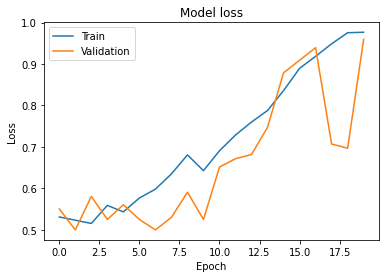

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the figure as a PNG file
#plt.savefig('loss_curves_model1.png', bbox_inches='tight')

In [81]:
img = keras.preprocessing.image.load_img(
    "data//training_set//cats//cat.4189.jpg", target_size=input_shape
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

This image is 73.72% cat and 26.28% dog.


In [67]:
import numpy as np

In [70]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [76]:
print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
    "data//test_set",
    target_size=(256, 256),
    batch_size=batch_size,
    shuffle=True
)
predictions = model.predict(test_generator, verbose=1)
y_predictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

#model.save(MODEL_FILENAME)


==============TEST RESULTS============
Found 400 images belonging to 2 classes.
4/4 [==============================] - 3s 565ms/step


In [77]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(test_generator, verbose=1)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(true_classes, y_predictions)
print('Test accuracy:', accuracy)


4/4 [==============================] - 3s 564ms/step
Test accuracy: 0.5


In [52]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,